# Processamento de Linguagem Natural

Vou abordar o conteito de processamento de linguagem natural ou [PLN](https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural). Esta é uma das técnicas que o Google utiliza para interpretar o que foi escrito na barra de busca dele. Geralmente outros buscadores fazem isto também, mas o google é o mais utilizado.

Como ele faz para entender o que você esta querendo dizer?? Bom: Processamento de Linguagem Natural.
Com a PLN o google pode trazer os resultados mais relevantes para sua pesquisa, assim como o Google Home, Alexa ou Siri fazem para entender o que você esta falando... Tudo isso é processamento de linguagem natural.

Vamos iniciar desenvolvendo um analisador de sentimentos através da NPL(Natural Processing Language), mas como isso funciona??

Imagina que você quer assistir um filme então você vai lá e busca criticas sobre o filme por exemplo no site [Adoro Cinema](http://www.adorocinema.com/). Esta critica do filme você vai interpretar e aí você irá classificar como bom ou ruim, ou com estrelas... **E é exatamente isto que nosso algorítmo irá fazer: Classificar críticas de filmes**.

Para isso vamos:

* Importar uma base de dados já classificada.
* Criar um modelo de machine learn capaz de interpretar a lingaugem humana e classificar este texto (atráves de *WORD CLOUDS*).
* Pré processamento de texto para torna-lo mais preciso.
* Usar a distribuição de pareto para ajudar na análise de dados.
* Realizar Tokenização com o [NLTK](https://www.nltk.org/)

## Começando

Vamos usar uma base de dados do IMDB disponível do [kaggle](https://www.kaggle.com/) 

In [1]:
import pandas as pd
#para que os algorítmos peguem sempre a mesma semente
import numpy as np 
np.random.seed(42)


Se for necessário baixe o `.csv` aqui: 

https://www.kaggle.com/luisfredgs/imdb-ptbr

In [2]:
resenha = pd.read_csv('./dados/imdb-reviews-pt-br.csv')


In [3]:
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

## Usando o sklearn

Dentro da biblioteca sci-kit learn no módulo **model_selection** tem uma função chamada `train_test_split` que faz justamente o que precisamos: 

* Reservar dados para treinar o modelo.
* Reservar dados para testar o modelo 

Esta função esta disponível aqui: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Como argumento a função `train_test_split` recebe: `data_x`, `data_y`, `test_size`

O retorno dela é: `x_treino`, `x_teste`, `y_treino`,`y_teste`

Em alguns lugares a coluna $y$ é chamada de classificador porque entendemos o modelo como uma função $f()$. Desta forma temos $x_{treino}$ que sera aplicado no modelo $f()$ e irá gerar o $y_{treino}$ tal que: 

$y_{treino} = f(x_{treino})$

Com o $y_{treino}$ comparamos com o $y_{teste}$. Ou seja, $y$ é a classificação do conjunto de dados de teste

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_treino, x_teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                                  resenha.sentiment,
                                                                  random_state = 42)

# Usando o SKlearn Linear Model Logistic Regression 

O modelo de regressão linear usando a função logistica. A função [logistica](https://en.wikipedia.org/wiki/Logistic_function) ou também conhecida como função logística, até sigmoide, é uma curva em forma de "S"

<img src='./images/Logistic-curve.png' >

É sabido na literatura que a curva logistica é usada como classificador de uma logistic regression, maximum-entropy classification e linear-log classification.

Este modelo esta disponível em: 

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
#instanciando modelo
regressao_logistica = LogisticRegression()
#treinando modelo
#regressao_logistica.fit(x_treino, classe_treino)
#testando o modelo: acuracia 
#acuracia = regressao_logistica.score(x_teste, classe_teste)
#exibindo acuracia
#acuracia

# NOTE O ERRO: 

O erro acima indica que o modelo não consegue converter uma `string` em `float`. É neste ponto em que entra o NLP entra, pra fazer a conversão entre linguagem natural para uma linguagem de máquina.

## Mas antes:

Temos que salientar alguns pontos de NLP. 

Primeiro, precisamos conhecer nossa base de dados, ou seja os textos. Se são longos ou curtos, como ela se comporta, se temos dicas que podem existir no texto para os classificadores para ajudar a definir se é positivo ou negativo. 

Por exemplo: `Filme ok` essa resenha é dificil de classificar, mas esta `Filme ok :(` é mais fácil, pois temos uma carinha triste `:(`. Outro exemplo seria `Filme ok :)`

Bom mas isso aqui não é o que aparece na nossa base de dados, nós temos textos longos, que precisam ser submetidos à uma análise mais fina.


In [8]:
print('Negativa\n')

print(resenha.text_pt[189])

Negativa

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [9]:
print('Positivo\n')

print(resenha.text_pt[49002])

Positivo

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior

É importante ler um pouco sobre a base de dados, pois prá nós é simples ler um texto e extrair a opinião superficial da pessoa que o escreveu, mas isso não é tão fácil para o computador. Por isso ao ler podemos identificar algumas características de filmes classificados com positivos e negativos, por exemplo a palavra `'pior'` ou `'BRILHANTE!!!'`

### Segundo ponto:

A quantidade de dados. Não é novidade que para este tipo de análise seja necessário muitos dados, nossa base por exemplo tem quase 50K resenhas, mas pra que nosso modelo não seja enviesado é DE **SUMA IMPORTÂNCIA** que os dados sejam equivalentes, ou seja, a mesma quantidade de negativos tenha de positivos ou que, pelo menos você faça um pré processamento para que ele fiquem balanceados.

Isso é importante porque novamente **evita que o modelo fique enviesado e comece a achar que a maioria das resenhas são positivas ou negativas**... 

In [10]:
# A quantidade de avaliações positivas e negativas:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [11]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

# Aletarndo para classificação binaria

Note que temos avialiação de sentimentos como `neg` e `pos`. Então vamos vazer um mapeamento de `neg → 0` e `pos → 1`.

In [12]:
classificacao = resenha['sentiment'].replace(['neg','pos'],[0,1])

In [13]:
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [14]:
resenha['classificacao'] = classificacao

In [15]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

Agora já transformamos um dado textual em numérico sem perder o sentido.


# Processamento de Lingugagem Natural

É uma subárea da inteligência artificial que se preocupa em estudar a estrutura que gerencia a comunicação entre linguagem natural (humanos, português, inglês...) e a linguagem de máquina (computador, bits).

Dentro da PLN existe a analise textual, análise de sentimentos por texto, por imagens, enfim, várias outras subáreas...

## Vamos transformar texto em linguagem de máquina:

Quando temos as frases, ou melhor, na linguagem de PLN, o *corpus*:

    O filme é muito bom.
    O filme é muito ruim.
    
No nosso caso, todas as resenhas compõe nosso *corpus textual*. Neste exemplo acima, nosso corpus textual é bem mais simples. Similar ao meu post ["Isso é ou não um porquinho"](https://medium.com/@opolidordelentes/isso-%C3%A9-porquinho-ou-cachorrinho-f65bfd0215b4), podemos estratificar essa frase e atribuir uma classificação binária a cada palavra... 

Vamos criar um **Vocabulário**. Este vocabulário vai ter todas as minhas palavras mas sem repetições.

Aplicando a função `split()` nas frases por exemplo, temos:
```
['O', 'filme', 'é', 'muito', 'bom']
['O', 'filme', 'é', 'muito', 'ruim']
```

adicionando os elementos dessa lista em um `set()` temos:
`['O', 'filme', 'é', 'muito', 'bom', 'ruim']`
Então montamos uma matriz, com as letras sendo as colunas: 

<img src='./images/vocabulario.png' width=50%>

Ou seja, cada frase pode ser representada por um **vetor** e de forma bem simples podemos classificar uma frase como **boa** ou **ruim**. Apesar de ser uma forma simples é muito poderosa, então use abuse deste método de usando nas colunas variáveis linearmente independentes.

Mas e a frase: 
    
    O filme é muito muito bom.
    
como podemos enfatisar uma palavra?? Bom podemos fazer da seguinte maneira: 

<img src='./images/vocabulario_com_palavra_dupla.png' width=60%>

Essa forma vetorial de tratar frases pode ser uma forma bem eficiente além de modelar uma frase, consegue inferir uma intensidade a cada palavra! Para saber mais sobre esta representação procure por **"Sacola de palavras" ou [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model)**.


# Vamos então criar nosso Bag of Words:

Nosso dataset do IMDB possui quase 50 mil registros. Esse é um conjunto de dados grande e pidemos utilizar um dataframe do pandas parada guardar as informações dele.

Como acabamos de ver uma bag of words cria um label para cada palavra e caso isso se aplique no nosso dataset é provavel que tenhamos mais elementos *nulos* do que elementos preenchidos, quando isso acontece chamamos essa matriz de **matriz esparsa** ou **[sparce matrix](https://en.wikipedia.org/wiki/Sparse_matrix)**

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/0fce3708488472b34a85f11f54d8df3eeab1aabc'>

Não é muito eficiente armazenar toda a matriz, porque alocar valores 0 (zero é diferente de null) pode ser um desperdicio de memória e em alguns casos levar ao **[overflow](https://en.wikipedia.org/wiki/Buffer_overflow)**, por isso cuidado ao trabalhar com matrizes esparsas. Para isso o pandas tem uma estrutura especial para trabalhar com matrizes esparsas, essa estrutura armazena apenas os valores diferentes de zero em uma entidade de controle.

Nós vamos usar o `DataFrame.sparse.from_spmatrix` do pandas, para usar o `DataFrame.sparse.from_matrix` passamos como parâmetro:

```
pandas.DataFrame.sparse.from_matrix(bag_of_words, columns=vetorizar.get_feature_names())
```
Então o `DataFrame.sparse.from_matrix` recebe uma matriz esparsa (variável matriz_esparsa) e nos retorna um Dataframe (variável do tipo dataframe). Para mais informações busque em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html

A principio vamos utilizar o objeto `CountVectorizer()` que cria um modelo que irá vetorizar as palavras que são passadas à ele pela fução `.fit()`

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']

# vetorizar porque esse objeto é responsável por vetorizar frases
vetorizar_frase = CountVectorizer(lowercase=False)

#contruindo sacola de palavras
bag_of_words = vetorizar_frase.fit_transform(texto)

In [18]:
vetorizar_frase.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [19]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [20]:
matriz_sparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                                  columns=vetorizar_frase.get_feature_names())
matriz_sparsa

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

é importante usar o objeto `DataFrame.sparse.from_spmatrix` para construir a matriz sparsa 


# Aplicando em nosso database

In [21]:
# vetorizar porque esse objeto é responsável por vetorizar frases
vetorizar_frase = CountVectorizer(lowercase=False, max_features=50)

#contruindo sacola de palavras
bag_of_words = vetorizar_frase.fit_transform(resenha.text_pt)

print(bag_of_words.shape)

(49459, 50)


Note que este vetor de dimensão $(49459, 156923)$ é caro computacionalmente falando... Um jeito de contornar esse problema **com perda de informação** é ao instanciar o `CountVectorizer()` passar o parâmetro `max_features` isso vai limitar a ordem do vetor que será retornado e ele só irá retornar as palavras que mais aparecem...

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [22]:
# separando os dados em treino e teste
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                             resenha.classificacao,
                                                             random_state=42)
# ajustando o modelo 
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.6583097452486858

In [23]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizar_frase = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar_frase.fit_transform(texto[coluna_texto])
    
    #separando em dados de treino e testo:
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                 texto[coluna_classificacao],
                                                                 random_state=42)
    # ajustando o modelo 
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)


print(classificar_texto(resenha,"text_pt", "classificacao"))
    

0.6583097452486858


Como agora já temos a precisão do modelo pra determinar qual a taxa de acerto de um dado filme, vamos colocar as palavras com maior representatividade semântica na classificação de um filme sendo "bom" ou "ruim" estejam mais proximas o possível das *50 features* selecionadas pelo modelo através do parâmetro `max_features`. Para ter uma ideia melhor de quais são as 50 features mais "relevantes" do nosso corpus textual vamos usar uma técnica chamada **word_cloud**.

# Word Cloud

Você provavelmente já viu uma **word cloud** em algum site, buzzfeed por exemplo. Se não viu recomendo que use mais a internet (kkkkk) mas se você não reconhece pelo nome, talvez reconheça pela imagem:

<img src='./images/word-cloud.png'>

Em outras palavras, uma ***word cloud*** é uma imagem gerada com as principais palavras de um texto distribuídas em um espaço, de modo que o tamanho de cada palavra é proprocional à sua ***frequência*** de aparição no conjunto de dados. Ela ajuda cientistas de dados da área de processamento de linguagem natural a melhorar o resultado dos seus modelos. Com essa proporção da palavra com a frequência fica relativamente fácil identificar quais palavras são mais importantes num database.

Existe um repositório do github com um nome que não é tão intuitivo para gerar wordcloud, o repositório é este aqui: [repositório](https://github.com/amueller/word_cloud)

Já a documentação desta biblioteca esta disponível [aqui](http://amueller.github.io/word_cloud/) 

A função que vamos utilizar se chama `wordcloud()` a descrição desta função esta aqui: 
http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

Ela recebe como parâmetro uma lista contendo todas as palavras a serem utilizadas pra construção da wordcloud:

Eu tentei rodar com todas as palavras na séries `resenha.text_pt` entretanto são, ao realizar o algorítmo 

```
todas_as_palavras = ''.join([texto for texto in resenha.text_pt])
```


são retornadas 63 milhões palavras, o esforço computacional pra isso é muito alto. Portanto talvez seja necessário fazer apenas com 60% das frases contidas em `resenha.text_pt` que são 37 milhões de palavras. Selecionando amostras aleatórias com o `sample()` ou com uma % menor do dataset.

In [24]:
%matplotlib inline

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#60% das resenhas.text_pt
#amostra_da_resenha = int(len(resenha.text_pt)*0.6)
# atraǘes desta list comprehencion vamos contruir uma lista contendo todas as resenhas.
#mas queremos UMA LISTA COM TODAS AS PALAVRAS, não com as frases. Então usamos o ' '.join(lista)
todas_as_palavras = ' '.join([texto for texto in resenha.text_pt])



# Aqui vem uma discussão importante: 
nuvem_de_palavras = WordCloud(width=800, # alterar width e height não alera o tamanho
                              height=500, # da imagem apenas a área distribuição das palavras
                              max_font_size=110, # altera o tamanho de cada fonte na wordcloud
                              collocations=False).generate(todas_as_palavras)


In [26]:
# no que é um objeto
nuvem_de_palavras

Vamos plotar esse objeto com o matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

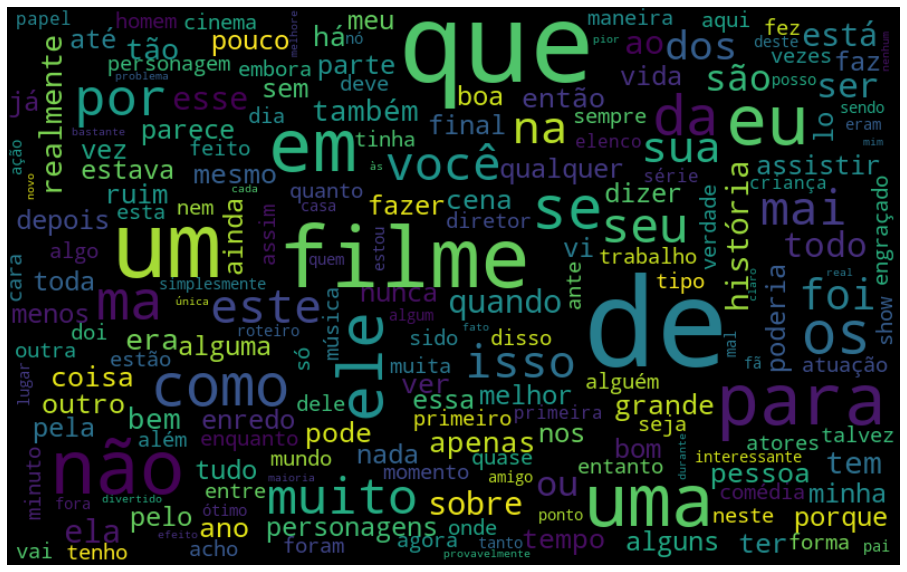

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show

## Analisando a Word Cloud 

Podemos notar que as palavras "não","para","que","filme","de" são palavras que aparecem em maior destaque na wordcloud, mas séra que elas realmente ajudam a classificar se um filme é bom ou ruim?? Provávelmente não, e é exatamente esta função da WORD CLOUD! Nos ajudar a verificar se as palavras que estão sendo escolhidas como "mais relevantes" são realmente suficientes pra determinar se um filme é bom ou ruim, e melhorar os resultados. 

### Outro ponto

Faz sentido olhar para as palavras "positivas" e "negativas" ao mesmo tempo?? Até certo ponto pode fazer sentido, mas talvez seja melhor olhar para as plavras "positivas" separada das "negativas", assim é possível fazer uma analise mais fina de como o algorítmo esta analisando as palavras pra classificar um comentário... 

### Fazendo consulta no Dataframe: Resenha

Como queremos semparar as palavras cuja classificação foi positiva e outra negativa, podemos filtrar nosso dataframe usando o método `query()` que faz uma consulta. A documentação do método query diz que "consulta as colunas de um Data Frame com expressões booleanas"

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

In [28]:
resenha.query('sentiment == "pos"')

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

O retorno foi os dados apenas que contém o valor 'pos' na coluna `sentiment`, se você tem dúvida pode usar o método `sentiment.unique()`

In [29]:
resenha.query('sentiment == "pos"').sentiment.unique()

array(['pos'], dtype=object)

Como a única coisa que precisamos é de dois data frames para gerar as palavras com os sentimentos negativos e positivos é mais interessante criarmos uma função pra criação da **word cloud**

In [30]:
def nuvem_de_palavra(data, coluna):
    todas_as_palavras = ' '.join([texto for texto in data[coluna]])
    nuvem_de_palavra = WordCloud(width=800, # alterar width e height não alera o tamanho
                              height=500, # da imagem apenas a área distribuição das palavras
                              max_font_size=110, # altera o tamanho de cada fonte na wordcloud
                              collocations=False,
                                colormap='hot').generate(todas_as_palavras)
    
    plt.figure(figsize=(25,25))
    plt.imshow(nuvem_de_palavra, interpolation='bilinear')
    plt.axis('off')
    plt.show

Fazendo as querys:

In [31]:
palavras_positivas = resenha.query('sentiment == "pos"')
#nuvem_de_palavra(palavras_positivas, "text_pt")
palavras_negativas = resenha.query('sentiment == "neg"')
#nuvem_de_palavra(palavras_negativas, "text_pt")

Construindo funções separadas

In [32]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('sentiment == "neg"')
    todas_as_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    
    nuvem_de_palavra = WordCloud(width=800, # alterar width e height não alera o tamanho
                              height=500, # da imagem apenas a área distribuição das palavras
                              max_font_size=110, # altera o tamanho de cada fonte na wordcloud
                              collocations=False,
                                colormap='hot').generate(todas_as_palavras)
    
    plt.figure(figsize=(25,25))
    plt.imshow(nuvem_de_palavra, interpolation='bilinear')
    plt.axis('off')
    plt.show
    
    
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('sentiment == "pos"')
    todas_as_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    
    nuvem_de_palavra = WordCloud(width=800, # alterar width e height não alera o tamanho
                              height=500, # da imagem apenas a área distribuição das palavras
                              max_font_size=110, # altera o tamanho de cada fonte na wordcloud
                              collocations=False,
                                colormap='hot').generate(todas_as_palavras)
    
    plt.figure(figsize=(25,25))
    plt.imshow(nuvem_de_palavra, interpolation='bilinear')
    plt.axis('off')
    plt.show

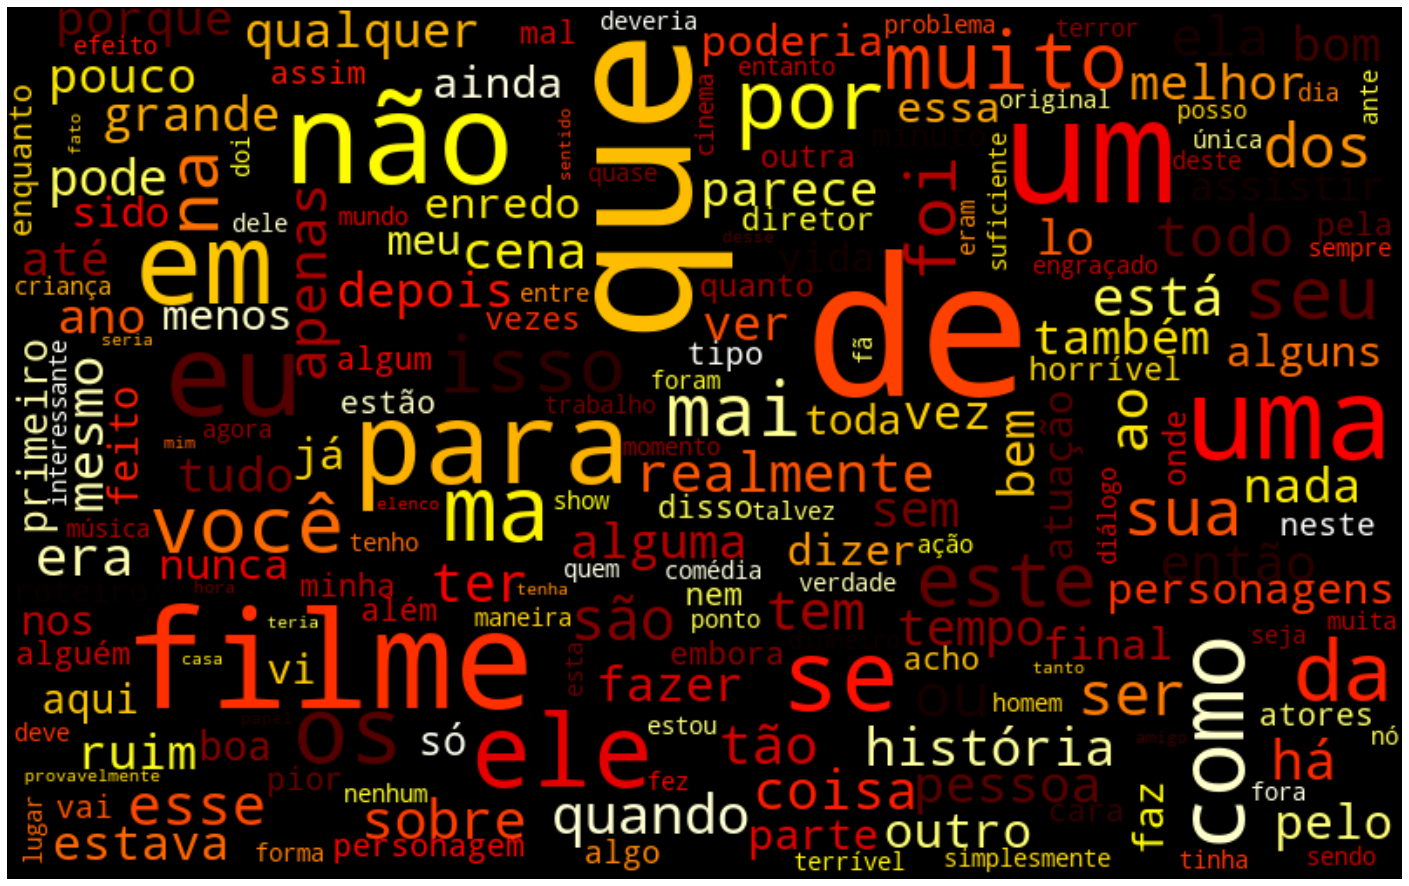

In [33]:
nuvem_palavras_neg(resenha, "text_pt")

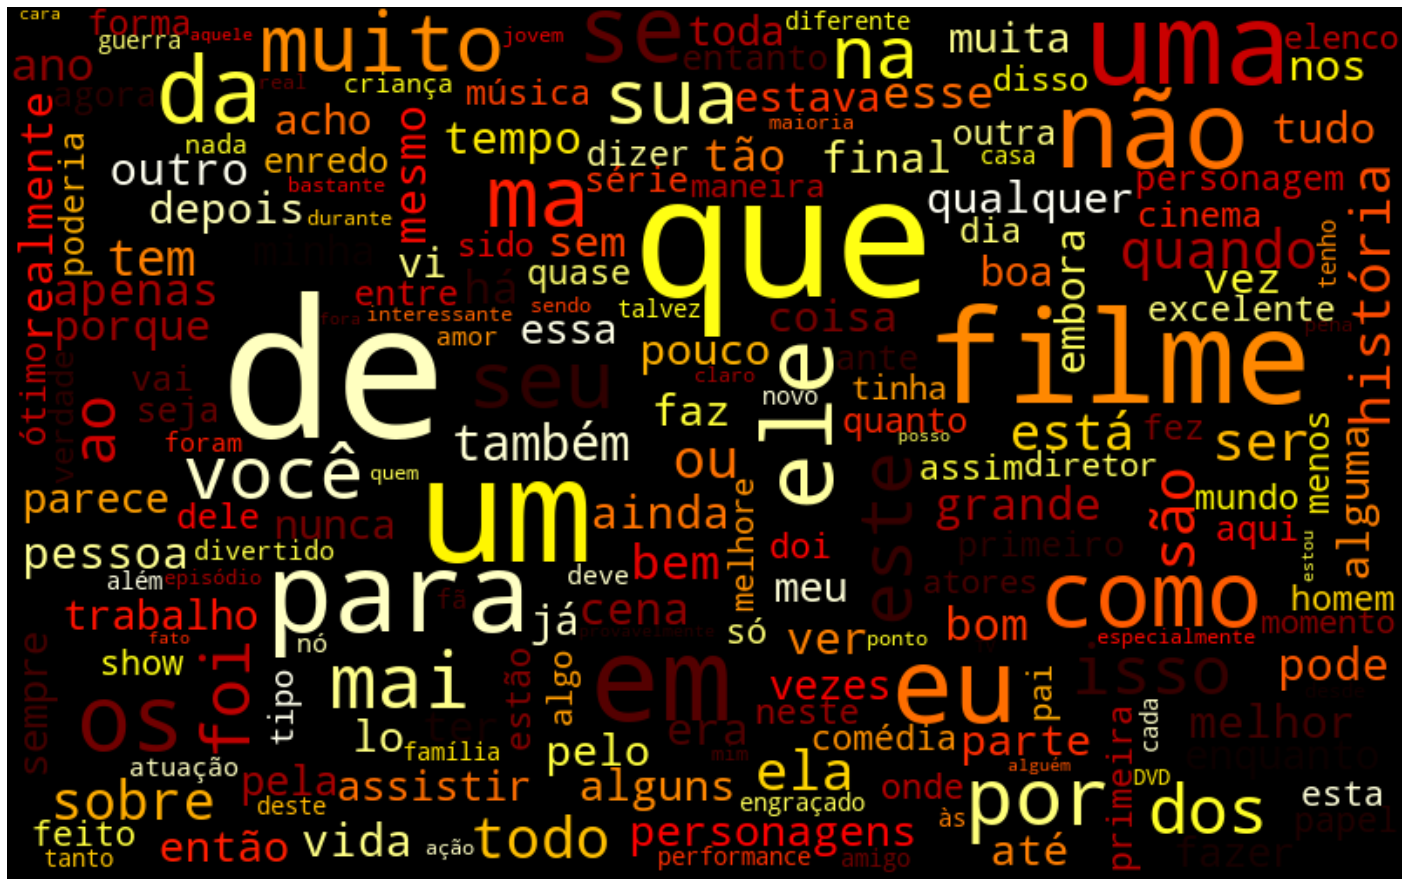

In [34]:
nuvem_palavras_pos(resenha, "text_pt")

# NLTK 

Agora vamos criar uma vizualização pra saber quais são as 20/50 palavras mais utilizadas num conjunto de frases. Para esta tarefa vamos usar a biblioteca em python chamada [NLTK](https://www.nltk.org/) ou Natural Language Toolkit.

Esta biblioteca talvez seja uma das melhores da área NLP, pois em alguns setores da computação geralmente uma biblioteca escrita em alemão funciona bem em inglês, mas se tratando de processamento de linguagem natural isso nem sempre acontece. 

A forma que o português é estruturado é diferente da forma que o alemão é estruturado e isso se reflete nos algorítmos, fazendo com que alguns algorítmos sejam específicos para cada idioma e o NLTK trás suporte para divérsas línguas.

## Instalando 

Para utilizar o NLTK não é diferente de outra biblioteca externa, precisamos instalar 

primeiro precisamos instalar via `pip` e depois baixar os dados com: 

`import nltk `

`nltk.download('all')`

A documentação do NLTK esta aqui:

https://www.nltk.org/py-modindex.html

In [35]:
#!pip install nltk

In [36]:
import nltk 

### Freqência

O objetivo agora é analisar quais as palavras que aparecem com maior frequência, pra isso vamos usar uma função chama `nltk.fraqDist()` a descrição dela esta disponível aqui: https://www.nltk.org/api/nltk.html?highlight=freqdist

Vamos á um exemplo de como funciona o NLTK: 

In [37]:
frase_qualquer = ['Um filme muito bom', 'Um filme muito ruim']
frequencia_das_palavras = nltk.FreqDist(frase_qualquer)
frequencia_das_palavras

FreqDist({'Um filme muito bom': 1, 'Um filme muito ruim': 1})

Note que `FreqDist()` tem como retorna um objeto do tipo `nltk.probability.FreqDist`. Note que ele fez a contagem da frequência os elementos da lista `frase_qualquer` ou seja, se queremos que ele mostre a distribuição de frequências temos que passar as frases "splitadas" como argumento.

Exemplo: 
```
>>> ' '.join(frase_qualquer)
'Um filme muito bom Um filme muito ruim'

>>> ' '.join(frase_qualquer).split()
['Um', 'filme', 'muito', 'bom', 'Um', 'filme', 'muito', 'ruim']

>>> nltk.FreqDist(' '.join(frase_qualquer).split())
FreqDist({'Um': 2, 'filme': 2, 'muito': 2, 'bom': 1, 'ruim': 1})
```

In [38]:
# exemplo 
nltk.FreqDist(' '.join(frase_qualquer).split())

FreqDist({'Um': 2, 'filme': 2, 'muito': 2, 'bom': 1, 'ruim': 1})

Este processo de "splitar" palavras de uma frase se chama **tokenização** então para faze-lo já existe uma ferramenta pronta no nltk, chamada tokenize que cria os **tokens**. Os tokens em PLN são as palavras que estão contidas dentro de uma frase.

In [39]:
from nltk import tokenize

frase_qualquer = "Bem vindo ao mundo do Processamento de Linguagem Natural!"

# objeto que irá criar os tokens a partir de um espaço em branco
token_espaco = tokenize.WhitespaceTokenizer()

#tokens da frase "Bem vindo ao mundo do processamento de Linguagem Natural!"
tokens_da_frase = token_espaco.tokenize(frase_qualquer)
print(tokens_da_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'Processamento', 'de', 'Linguagem', 'Natural!']


Note que a função acima evita que precisemos criar uma função específica para quebrar as frases usando o `join` e o `split()` (hehe). Deixando qualquer sentença pronta para ser analisada a distribuição das frequências das palavras...

# Implementando a tokenização aos nossos dados

A nossa vantagem é que já referênciamos a variável `todas_as_palavras` à uma lista na memoria contentdo todas as frases em uma única lista. Basta passar esta referência à função `tokenize()` do objeto `WhitespaceTokenizer`

In [40]:
todas_as_palavras[:100]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terr'

### OBS:
É possível que ao rodar a célula abaixo ocorra um erro avisando que esta extrapolando o limite de memória utilizado pelo kernel do Jupyter.

In [41]:
token_espaco = tokenize.WhitespaceTokenizer()
tokens_de_todas_as_palavras = token_espaco.tokenize(todas_as_palavras)

frequencia = nltk.FreqDist(tokens_de_todas_as_palavras)

In [42]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

Note que agora temos um dicionário das frequências das palavras utilizadas na frase.

In [43]:
df_frequencias_das_palavras = pd.DataFrame({'palavra': list(frequencia.keys()),
                                           'frequencia': list(frequencia.values())})


In [44]:
df_frequencias_das_palavras.head()

palavra  frequencia
0    Mais        1538
1     uma      130888
2    vez,        1927
3       o      244881
4     Sr.        1741

Vamos usar o método `nlargest(coluna)` para ordenar os 10 registros mais utilizados numa coluna do dataframe 

In [45]:
df_frequencias_das_palavras.nlargest(columns='frequencia', n=20)

palavra  frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915
116    para      126556
8     filme      117543
13       do      101737
32      com       99174
67     como       78361
96       os       73766
151      se       72245
27       eu       68814
235     mas       64788
389      da       61901

# Gráfico de Pareto 

Para visualização desta distribuição de frequências vamos usar um gráfico de pareto, é um grafico de barras. A distribuição de pareto é uma distribuição bem importante nas ciencias naturais e humanas.

Você pode ler mais sobre o Diagrama de Pareto aqui: https://pt.wikipedia.org/wiki/Diagrama_de_Pareto

E sobre a distribuição de Pareto aqui: https://en.wikipedia.org/wiki/Pareto_principle

A biblioteca que vamos utilizar é o [Seaborn](https://seaborn.pydata.org/), ele é uma biblioteca um nível mais alto que a [MatPlotLib](https://matplotlib.org/) então é relativamente mais simples de utilizar.

<function matplotlib.pyplot.show(*args, **kw)>

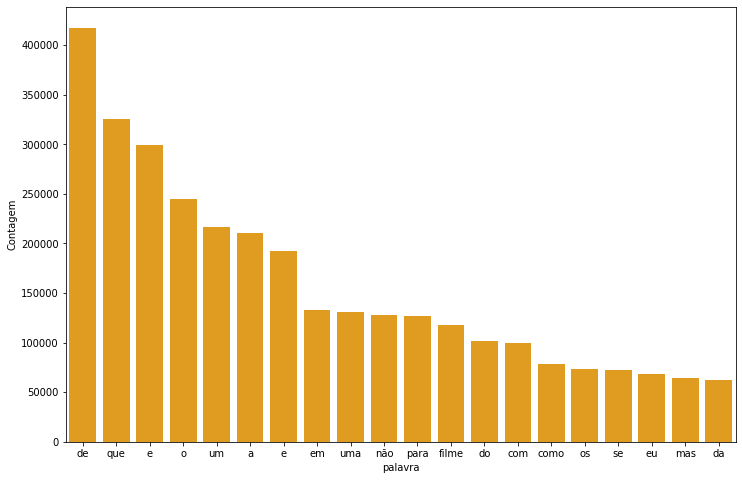

In [46]:
import seaborn as sns 


plt.figure(figsize=(12,8))

# em data vamos usar as nlargest() para não precisar plotar todas as palavras do dataframe
ax = sns.barplot(x='palavra', y='frequencia' ,data=df_frequencias_das_palavras.nlargest(columns='frequencia', n=20), color='orange')
ax.set(xlabel='palavra', ylabel='Contagem')
plt.show

Vamos contruir uma função que gera este gráfico a partir de um dataset de frequências das palavras.

In [47]:
def pareto(texto, coluna_texto, quantidade):
    # todas as palavras
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    # tokenização
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    # dataframe
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    # plot
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

In [48]:
amostra_das_resenhas= resenha.sample(int((len(resenha))*0.3))

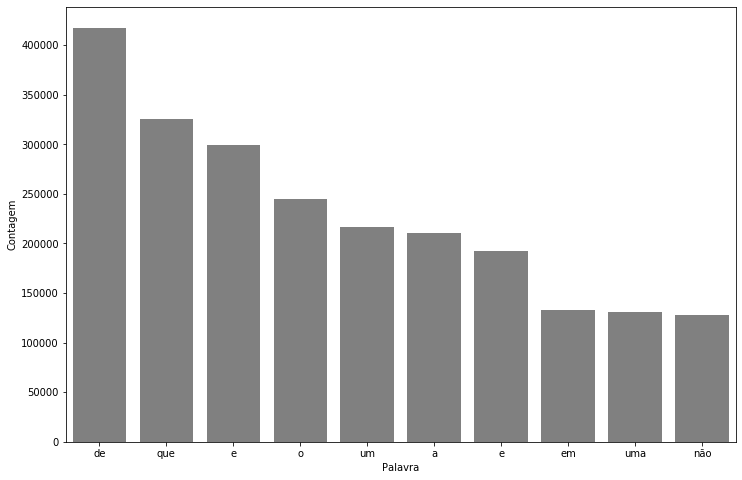

In [49]:
pareto(resenha,"text_pt",10)

# Tratamento das palavras

Agora que temos uma forma de verificar matemáticamente quais são as palavras que mais aparecem em um determinado texto, vamos retira-las até que as palavras que mais estejam em evidência sejam realmente aquelas que expressem algum sentimento bom/ruim sobre o filme em si.

Por exemplo, as palavras "de","que","e","o","um","a","em"... não agregam em nada para classificar se uma palavra tem um sentimento bom ou ruim. Em processamento de linguagem natural chamamos essas palavras de **"Stop words"**. 

Lembra que eu falei que o NLTK consegue trabalhar com divérsos idiomas?? Então o NLTK tem uma lista de **stopwords** interna.

Esse conjunto de **stopword** esta na classe `nltk.corpus.stopwords.words('idioma_desejado')` você pode ler mais sobre ela aqui: https://www.nltk.org/howto/portuguese_en.html

In [50]:
stopwrods_pt_br = nltk.corpus.stopwords.words('portuguese')
print(stopwrods_pt_br)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

Note que temos uma lista com as palavras que geralmente não contribuem semanticamente para análise de um texto. 

Então o que nós precisamos fazer é, pegar nosso texto alocado na variável `resenha`

In [51]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

e retirar em cada frase da coluna `"text_pt"` as `stopoword_pt_br`

Vamos ao script:

In [52]:
stopwrods_pt_br = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()
    frase_descartada = list()
    palavras_texto = token_espaco.tokenize(opiniao) #separar palavras de cada opiniao
    for palavra in palavras_texto:
        if palavra not in stopwrods_pt_br:
            nova_frase.append(palavra)  # neste ponto teremos uma nova frase sem as stopwords
        else:
            frase_descartada.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [53]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [54]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6607359482410028

Note que antes nosso resultado era 65% agora nosso resultado é de 66% parece um resultado inexpresível perto do modelo que a gente tinha antes, mas atualmente esse 1% pode fazer diferença a longo prazo.

Agora podemos rodar nossa função `pareto_graf` passando a coluna "tratamento_1" como parâmetro

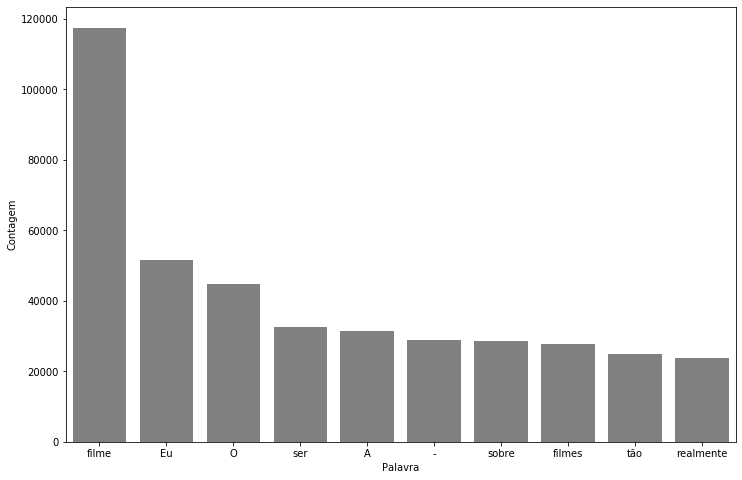

In [55]:
pareto(resenha, 'tratamento_1', 10)

# Tokenização com caracteres especiais

Imagine que temos dois comentários do tipo: 

    Perfeito, o filme.
    
    O filme é perfeito.
    
Se nós fizermos a tokenização dessas duas frases, teremos:

`perfeito,`

`perfeito.`

Note que são as mesmas palavras, o que difere uma da outra é o `.` e `,`. Acontece que o computador não sabe disso... Para ele são palavras diferentes. Por isso precisamos se preocupar com as pontuações. Mas como podemos manipular strings afim de tratar as pontuações e caracteres especiais?

SIMMM!!! ELE DE NOVO, O FAMOSO **NLTK**

No módulo `ntlk.tokenize` temos uma função chamada `WordPunctTokenizer()

https://www.nltk.org/api/nltk.tokenize.html`

In [56]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


Note que usando o "tokenizador" do tipo `WordPunctTokenizer()` conseguimos separar até o caracter `!`. 

Vamos então tentar implementar isso em todo nossa base de dados.

Primeiro precisamos saber quais pontos estão presentes no conjunto de dados. O python tem uma facilidade neste aspecto pois dentro do modulo `string` temos um atributo chamado "punctuation" que contem vários caracteres especiais, veja:

In [57]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Vamos construir uma lista contendo esses caracteres: 

In [58]:
pontuacoes = [ponto for ponto in punctuation]
print(pontuacoes)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


Agora vamos implementar algo parecido com o que fizemos para retirar as stopwords dos registros do dataframe resenha

In [59]:
pontuacao_stopwords = pontuacoes + stopwrods_pt_br

frase_processada = list()

for opiniao in resenha.tratamento_1:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_2'] = frase_processada

In [60]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

Vamos comparar por exemplo dois elementos da coluna "tratamento_1" e "tratamento_2"

In [61]:
resenha["tratamento_1"][2]

'Primeiro tudo odeio raps imbecis, poderiam agir arma pressionada contra testas. Tudo fazem amaldiçoar atirar outro agir versão clichê gangsters. O filme leva cinco minutos explicar acontecendo antes armazém. Não único personagem simpático nesse filme, exceção sem-teto, único metade cérebro. William Paxton William Sadler ambos "hill billies" Sadler tão vilão quanto gângsteres. Eu gostava desde começo. O filme cheio violência sentido especialidade Walter Hills: pessoas caindo janelas vidros voando toda parte. Não praticamente nenhum enredo grande problema torce ninguém. Todo mundo morre, exceto Paxton sem-teto todos recebem merecem. Os dois únicos negros podem atuar sem-teto viciado, atores profissão, irritantes rappers feios. Fique longe dessa porcaria. observe 48 horas 1 2 vez disso. No mínimo, têm personagens gosta, senso humor nada além atores reais elenco.'

In [62]:
resenha["tratamento_2"][2]

'Primeiro tudo odeio raps imbecis poderiam agir arma pressionada contra testas Tudo fazem amaldiçoar atirar outro agir versão clichê gangsters O filme leva cinco minutos explicar acontecendo antes armazém Não único personagem simpático nesse filme exceção teto único metade cérebro William Paxton William Sadler ambos hill billies Sadler tão vilão quanto gângsteres Eu gostava desde começo O filme cheio violência sentido especialidade Walter Hills pessoas caindo janelas vidros voando toda parte Não praticamente nenhum enredo grande problema torce ninguém Todo mundo morre exceto Paxton teto todos recebem merecem Os dois únicos negros podem atuar teto viciado atores profissão irritantes rappers feios Fique longe dessa porcaria observe 48 horas 1 2 vez disso No mínimo têm personagens gosta senso humor nada além atores reais elenco'

Note que os da coluna tratamento_2 não tem caracteres especiais como ". : , "

# Nova representação de barra

Vamos novamente rodar a função `pareto()` para analisar a frequencia das palavras:

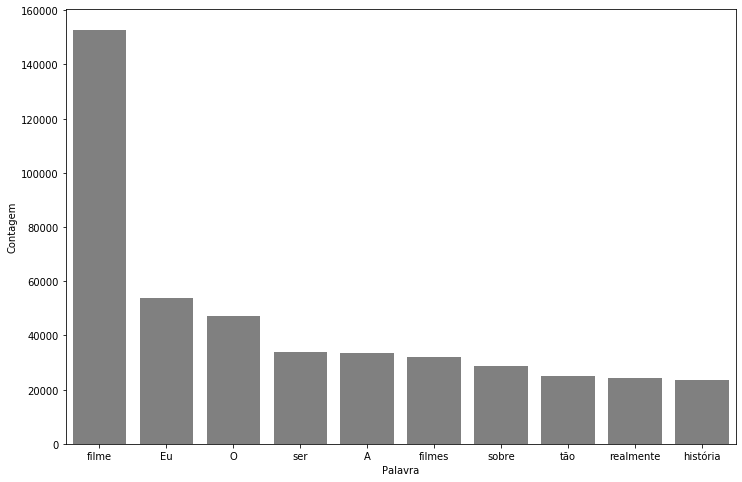

In [66]:
pareto(resenha, 'tratamento_2', 10)

Outra análise que precisamos fazer é tirar as palavras acentuadas por exemplo "é", este processo se chama normalização. Para isso usamos o módulo `unidecode` do python. (talvez seja necessário instalar o módulo [unidecode](https://pypi.org/project/Unidecode/))

In [124]:
import unidecode 

acentos = "ótimo péssimo não é tão"
teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [73]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [74]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

Agora precisamos fazer um tratamento para retirar os acentos dos stopwords porque pode acontecer de em tratamentos anteriores ter um "nao" sem o acento ~ 

In [76]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords] 
stopwords_sem_acentos

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

Veja agora temos as stopwords sem os acentos.

# Tratando a Base de Dados

Até agora temos quais dados? Os dados em portugês na coluna `text_pt`, temos os dados sem as `stopwords`na coluna `tratamento_1`. Também temos os dados do `tratamento_1` sem as `pontuações+stopwords` na coluna `tratamento_2`. Agora vamos criar a coluna de `tratamento_3`sem as stopwords pontuações e sem os acentos

In [77]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))

In [78]:
resenha['tratamento_3'] = frase_processada

In [79]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

vamos usar a função que criamos pra verificar a acurácia da classificação com a função `classificacao`

In [80]:
acuracia_tratamento3 = classificar_texto(resenha,'tratamento_3', 'classificacao')
print(acuracia_tratamento3)

0.6810351799433886


Nosso ultimo resutado esta alocado na variável `acuracia`

In [81]:
acuracia

0.6583097452486858

Compare a acurácia dos dois casos. Note que no caso do 'tratamento_3', ao retirarmos a pontuação, os caracteres especiais e os acentos. Tivemos um aumento de 2% em relação ao 'tratamento_1'.

É possível fazer uma análise ainda mais fina, plotando as núvens de palavras e o pareto afin de tentar encontrar palavras que não influenciem tanto 

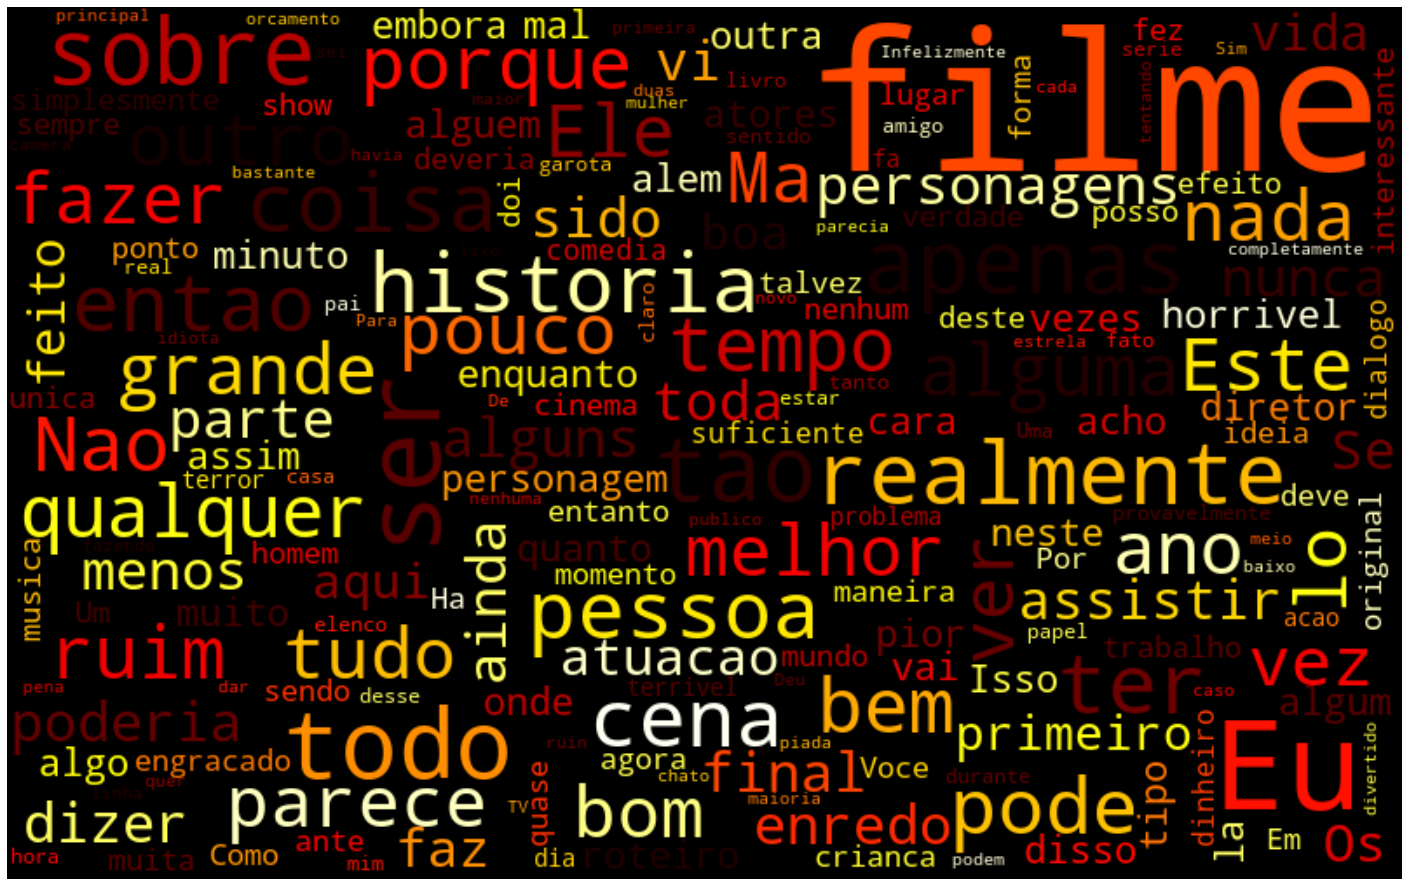

In [82]:
nuvem_palavras_neg(resenha,'tratamento_3')

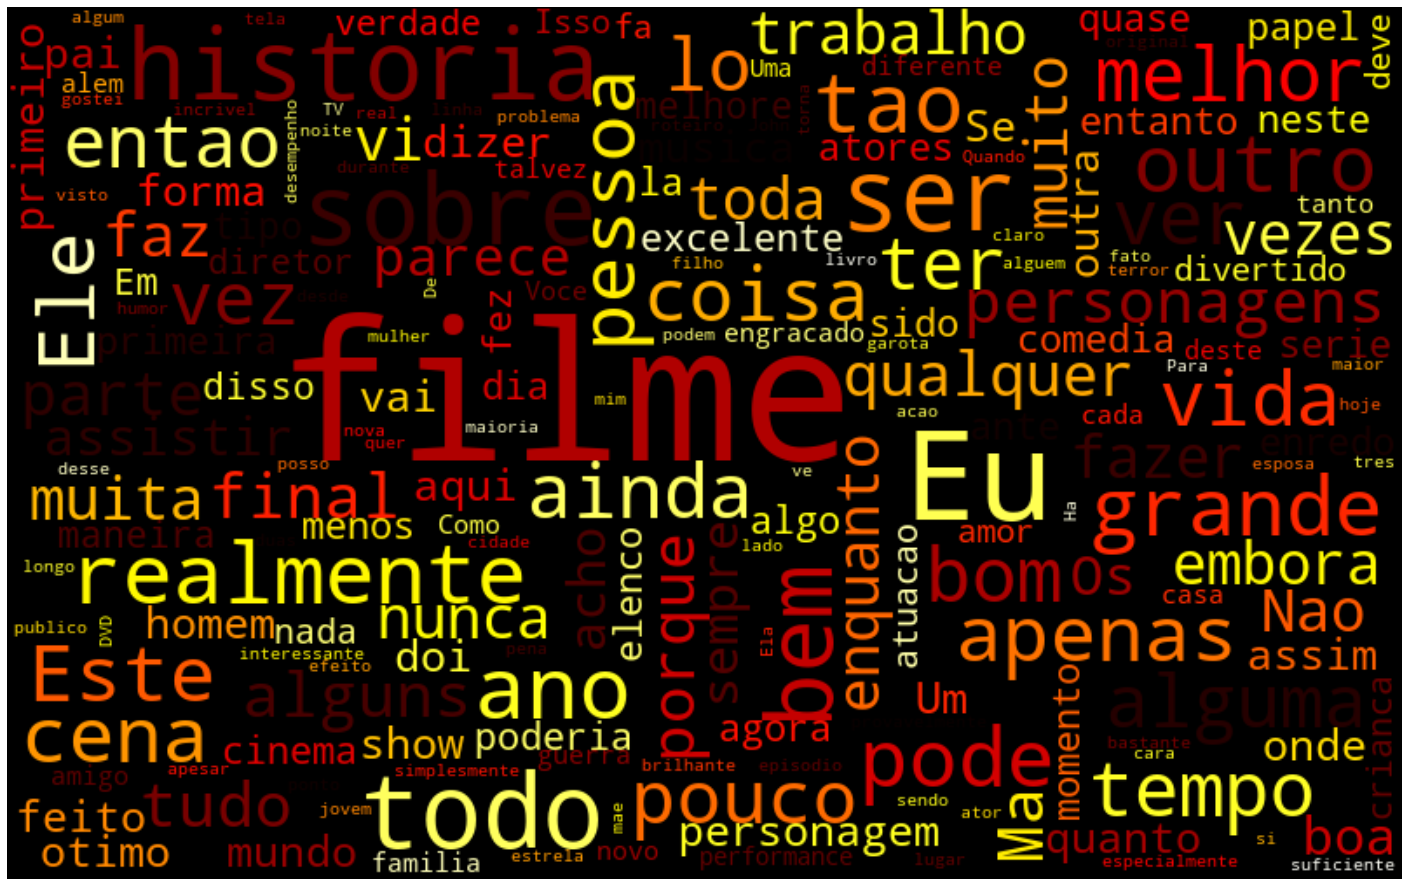

In [83]:
nuvem_palavras_pos(resenha,'tratamento_3')

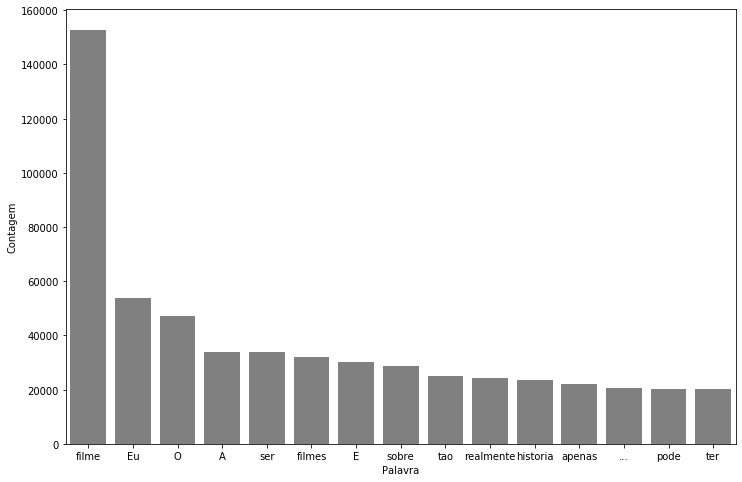

In [86]:
pareto(resenha, 'tratamento_3', 15)

A partir dos graficos é possível notar as letras "A","O","E" que não sairam por que são letras maiusculas. Essa é outra condição que pode ser imposta, deixar todo texto em minusculo...

In [89]:
frase = "Se o conhecimento fosse perigoso, a SOLUÇÃO seria a IGNORANCIA. Sempre me pareceu  que a solução seria a sabedoria."
print(frase.lower())

se o conhecimento fosse perigoso, a solução seria a ignorancia. sempre me pareceu  que a solução seria a sabedoria.


A frase ficou toda em letras minusculas. A solução é implementar os passos feitos nos "tratamentos" adicionando a condição de `lower()` às opiniões de cada elemento da coluna "tratamento_1|2|3"

In [90]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_4'] = frase_processada

In [91]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [92]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

É sempre importante depois de varios processos de tratamento dos dados fazer uma comparação entre os dados iniciais na coluna `text_pt` com os dados pós tratamento, no caso da coluna `tratamento_4`. Note que o texto pós tratamento é relativamente diferente do inicial.

Para comparar se houve um ganho de performace no modelo vamos rodar o modelo de classificação de texto e analisar a acurácia.

In [109]:
acuracia_tratamento2 = classificar_texto(resenha,'tratamento_2', 'classificacao')
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

In [115]:
print('Comparando acurácia dos tratamentos:')

print(f'tratamento 1: {(acuracia)*100 : 0.3f}%\ntratamento 2: {(acuracia_tratamento2)*100 : 0.3f}%\ntratamento 3: {(acuracia_tratamento3)*100 : 0.3f}%\ntratamento 4: {(acuracia_tratamento4)*100 : 0.3f}%')

Comparando acurácia dos tratamentos:
tratamento 1:  65.831%
tratamento 2:  68.120%
tratamento 3:  68.104%
tratamento 4:  68.791%


In [119]:
(acuracia_tratamento4 - acuracia_tratamento3)*

0.687424181156493

Você pode olhar este resultado e pensar "poxa vída! O aumento do tratamento 3 pro 4 foi de 7 décimos de diferença. Será que vale a pena?"

Bom pode parecer bobagem, mas as vezes errar uma ou em outra classificação de comentario pode não parecer significativo, entretanto a longo prazo esses 0.7% se acumulan a cada nova resenha, a cada nova visualização, e no fundo essas pequenas variações se acumulam. Por mais que cada classificação seja independente da outra, a precisão dos modelos no passado é importante pra predição do futuro.

Vamos ver as wordclouds para verificar se podemos fazer alguma análise ainda mais fina sobre as nossas palavras:

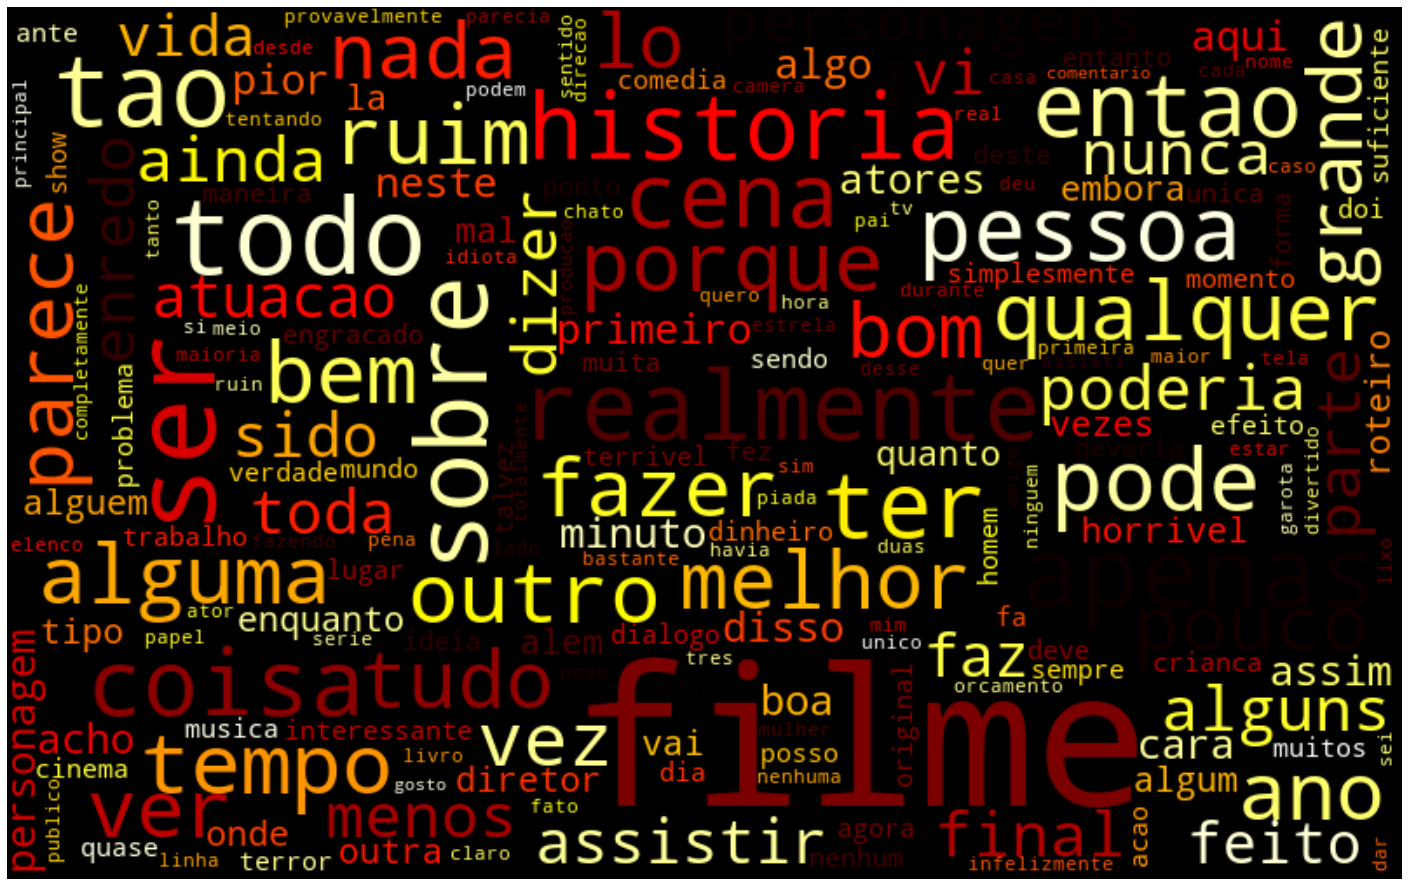

In [120]:
nuvem_palavras_neg(resenha,'tratamento_4')

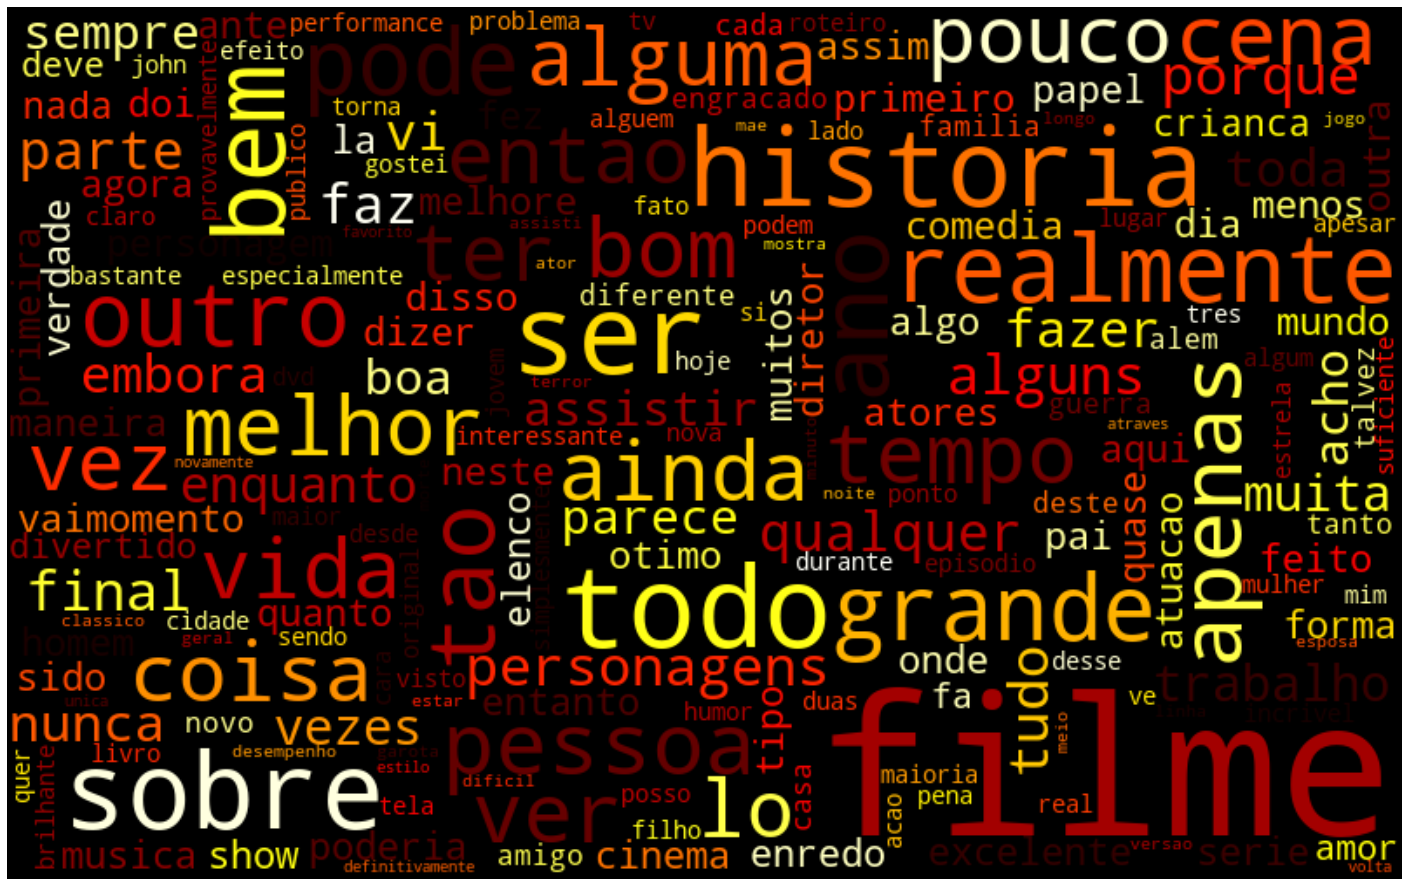

In [121]:
nuvem_palavras_pos(resenha,'tratamento_4')

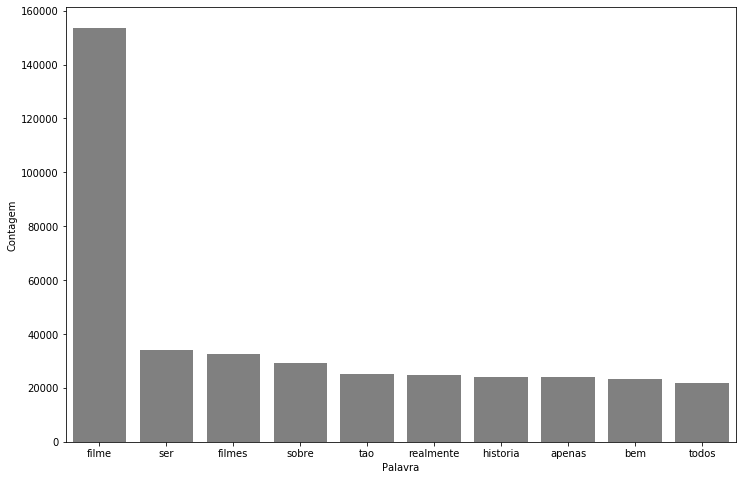

In [125]:
pareto(resenha,'tratamento_4', 10)

# Stemmização:

Este processo consiste em reduzir uma palavra ao seu radical, unindo palavras flexionadas e derivadas de um mesmo radical(com acréscimo de sufixo ou prefixo) que a rigor possuem um vaor semântico próximo. 

Por exemplo o a palavra "amoroso", "amado" e "amada". No processo de *stemmização* todas essas palvras são reduzidas ao radical da palavra, que no caso é "amor". No nosso pareto temos um exemplo, a palavra "filme" e "filmes". Ambas tem o mesmo radical.

Aqui temos um exemplo de como funciona um algorítmo muito utilizado no processo de stemmização. Este algorítmo se chama RSLP Stremmer. O interessante é que a famosinha NLTK fornece este algorítmo aqui:

https://www.nltk.org/_modules/nltk/stem/rslp.html

note que na propria documentação eles citam que o algorítmo é uma adaptação para o pytho e a fonte original do algorítmo é esta aqui: 

https://www.inf.ufrgs.br/~viviane/rslp/index.htm

A famosinha biblioteca NLTK fornece o algorítmo RSLP para o processo de stemmização, veja só: 

In [133]:
import nltk

stemmer = nltk.RSLPStemmer()
stemmer.stem("amoroso")

'amor'

Aplicando a Stemmização aos dados de classificação de filmes: 

In [ ]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(stemmet.stem(palavra))
            
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_5'] = frase_processada